# Baysian Regression

# AISC1001 - Statistical Modelling and Inference 01 (M07 Group 1)

# Prof. Cherin Hamadi

# Name : Pratik Domadiya

# Student Id : 500199494

# Task : Apply a linear regression model and a bayesian regression model on a dataset.

In [96]:
# load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
# load diabetes dataset
data=load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [98]:
data_df=pd.DataFrame(data.data,columns=data.feature_names)# convert dataset to pandas dataframe for finding correlation between features.

In [100]:
data_df.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [101]:
# Target column is not included in data so we need to add it first.
data_df['disease_progression']=data.target
(data_df.head(10))
      

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


In [102]:
# check for missing values
data_df.isnull().sum()
# there is no any missing values are present.

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
disease_progression    0
dtype: int64

In [103]:
# finding correlation between all the attributes
data_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [104]:
data_df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
age,1,0.17,0.19,0.34,0.26,0.22,-0.075,0.2,0.27,0.3,0.19
sex,0.17,1,0.088,0.24,0.035,0.14,-0.38,0.33,0.15,0.21,0.043
bmi,0.19,0.088,1,0.4,0.25,0.26,-0.37,0.41,0.45,0.39,0.59
bp,0.34,0.24,0.4,1,0.24,0.19,-0.18,0.26,0.39,0.39,0.44
s1,0.26,0.035,0.25,0.24,1,0.9,0.052,0.54,0.52,0.33,0.21
s2,0.22,0.14,0.26,0.19,0.9,1,-0.2,0.66,0.32,0.29,0.17
s3,-0.075,-0.38,-0.37,-0.18,0.052,-0.2,1,-0.74,-0.4,-0.27,-0.39
s4,0.2,0.33,0.41,0.26,0.54,0.66,-0.74,1,0.62,0.42,0.43
s5,0.27,0.15,0.45,0.39,0.52,0.32,-0.4,0.62,1,0.46,0.57
s6,0.3,0.21,0.39,0.39,0.33,0.29,-0.27,0.42,0.46,1,0.38


# split the data for training the model

In [105]:
# X_data = data_df.iloc[:, 0:-1].values
# y_data = data_df.iloc[:, -1].values
X = data.data
y=data.target
print(X.shape)
print(y.shape)
# Use only one feature - bmi because it's have the highest correlation with the target value
X =X[:, np.newaxis, 2]
print(X)

(442, 10)
(442,)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625]
 [-0.06332999]
 [-0.03099563]
 [ 0.02289497]
 [ 0.01103904]
 [ 0.07139652]
 [ 0.01427248]
 [-0.00836158]
 [-0.06764124]
 [-0.0105172 ]
 [-0.02345095]
 [ 0.06816308]
 [-0.03530688]
 [-0.01159501]
 [-0.0730303 ]
 [-0.04177375]
 [ 0.01427248]
 [-0.00728377]
 [ 0.0164281 ]
 [-0.00943939]
 [-0.01590626]
 [ 0.0250506 ]
 [-0.04931844]
 [ 0.04121778]
 [-0.06332999]
 [-0.06440781]
 [-0.02560657]
 [-0.00405033]
 [ 0.00457217]
 [-0.00728377]
 [-0.0374625 ]
 [-0.02560657]
 [-0.024

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [107]:
print("shape of x_train : ",X_train.shape)
print("shape of x_test : ",X_test.shape)
print("shape of y_train : ",y_train.shape)
print("shape of y_test : ",y_test.shape)

shape of x_train :  (353, 1)
shape of x_test :  (89, 1)
shape of y_train :  (353,)
shape of y_test :  (89,)


# Train OLS regression model

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
ols= LinearRegression()
ols.fit(X_train,y_train)
print( "Linear Regression..........  metrics")
print("model Training score : ",ols.score(X_train, y_train))# find the accuracy of training dataset

y_pred_test = ols.predict(X_test)

# Predicting MSE the Test set results
mse_linear = ((mean_squared_error(y_test, y_pred_test)))
print(" MSE    : ",mse_linear)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(" RMSE  : ",rmse_linear)

# Predicting RMSE the Test set results
mae_linear = (np.sqrt(mean_absolute_error(y_test, y_pred_test)))
print(" MAE   :",mae_linear)

Linear Regression..........  metrics
model Training score :  0.3559038012781607
 MSE    :  3698.9104408476555
 RMSE  :  60.81866852248292
 MAE   : 7.0543833706648655


Coefficients: 
 [985.81430751]
Coefficient of determination: 0.29


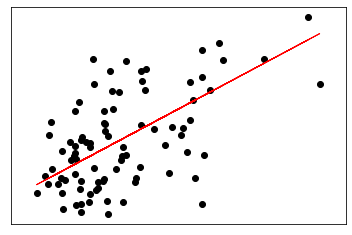

In [112]:
# The coefficients
print("Coefficients: \n", ols.coef_)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

# Plot outputs
plt.scatter(X_test[:,0], y_test, color="black")
plt.plot(X_test[:,0], y_pred_test, color="red", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

# Train Bayesian Regression model

In [110]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge
bayes_model= BayesianRidge()
bayes_model.fit(X_train,y_train)
print( "BAYESIAN Regression..........  metrics")
print("model Training score : ",bayes_model.score(X_train, y_train))# find the accuracy of training dataset

y_pred_test = bayes_model.predict(X_test)# test the data on trained model

# Predicting MSE the Test set results
mse_linear = ((mean_squared_error(y_test, y_pred_test)))
print(" MSE    : ",mse_linear)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(" RMSE  : ",rmse_linear)

# Predicting RMSE the Test set results
mae_linear = (np.sqrt(mean_absolute_error(y_test, y_pred_test)))
print(" MAE   :",mae_linear)

BAYESIAN Regression..........  metrics
model Training score :  0.3558943935391605
 MSE    :  3694.817424810578
 RMSE  :  60.78500986929736
 MAE   : 7.054190628991418


Coefficients: 
 [980.74590107]
Coefficient of determination: 0.29


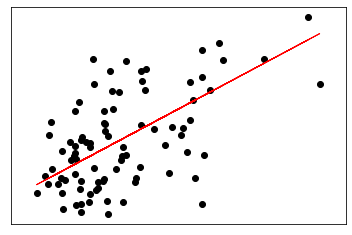

In [113]:
# The coefficients
print("Coefficients: \n", bayes_model.coef_)

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred_test))

# Plot outputs
plt.scatter(X_test[:,0], y_test, color="black")
plt.plot(X_test[:,0], y_pred_test, color="red", linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

# References : 

https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

https://www.geeksforgeeks.org/implementation-of-bayesian-regression/

https://towardsdatascience.com/introduction-to-bayesian-linear-regression-e66e60791ea7